# Research on video game successfulness
>Purpose: to analyze and identify patterns that determine whether a game succeeds or not

# Summary

An investigation was conducted to analyze and identify patterns that determine whether a game succeeds or not. Based on the data given, a video game's success can be determined on the region at focus because the earned number of sales differ between NA, EU, or JP if comparisons are being made. Considering this aspect, the NA region accrues the most sales followed by EU, and earning the least is JP. Overlooking the region factor, the data suggests that the platforms with the greatest total sales are the X360, PS3, DS, 3DS, and PS4. Analysis of the given data also implied that new platforms generally seem to take between 2.5 to 3 years to appear and old platforms seem to last for about nine years before fading out. For that reason, platforms that are released after 2010 (since the provided information goes to 2016) have the possibility for growth, and some potentially profitable platforms could be the XOne, PS4, and/or 3DS. Delving further into the global sales of all games that are broken down by the selected platforms, the output also showed that the average sales are greatest for the PS4 platform compared to the 3DS and XOne platforms. In particular, the relationship between the two types of reviews (user and critic) and platform sales was explored for the PS4. The data shows that both types of reviews have a weak correlation on the effect of PS4 sales, nonetheless out of the two weak correlated reviews, critic reviews have a higher correlation with platform sales than user reviews. Moreover, the notion of video-game, cross-platform capability as a factor for game success showed no such implication since certain games are more preferably played on certain preferential platforms. In addition to viewing particular game titles, the game genres were also observed, and the results exhibited the most profitable genres appearing to be action and sports games. Be that as it may, the high and low sales cannot be generalized about game genres as well as user ratings.
 
To this end, a successful game is: able to played on a platform that requires a television to be plugged in and has an action, role-playing, or sport genre.

##  Open the data file and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

try:
    game_data = pd.read_csv('/datasets/games.csv')
except:
    game_data = pd.read_csv('games.csv')
    
game_data.info()
game_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Conclusion

Upon looking at the general information for the data given, missing values are discernible for the variables *Name*, *Year_of_Release*, *Genre*, *Critic_Score*, *User_Score*, and *Rating*. There are some variables observed that do not have the appropriate data type and will be converted accordingly, such as: *User_Score* is shown as an object data type and will be changed to a float data type and *Year_of_Release* is displayed as a float data type and will be converted to an integer data type.

## Data preparation

In [2]:
# lowercasing column names
game_data.columns = map(str.lower, game_data.columns)

# determining proportion of missing values for each variable
game_data.isna().sum() / game_data.shape[0]
# dropping rows where 'name', 'year_of_release', and 'genre' have missing values
game_data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)
# replacing missing values
game_data['rating'] = game_data['rating'].fillna('Unknown')

# converting data to appropriate data types
game_data['year_of_release'] = game_data['year_of_release'].astype('int')
game_data['critic_score'] = pd.to_numeric(game_data['critic_score'], errors='coerce')

In [3]:
# checking for duplicates
game_data.duplicated().sum()

0

In [4]:
# analyzing values that have TBD abbreviation
print('Value counts for user_score before:')
print(game_data['user_score'].value_counts())
game_data['user_score'].replace('tbd', np.nan, inplace=True)
game_data['user_score'] = game_data['user_score'].astype('float')
print('Value counts for user_score after:')
print(game_data['user_score'].value_counts())

Value counts for user_score before:
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
0.6       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64
Value counts for user_score after:
7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64


In [5]:
# creating a column for total sales in all regions
game_data['total_sales'] = game_data['na_sales']+game_data['eu_sales']+game_data['jp_sales']+game_data['other_sales']
game_data.info()
game_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


### Conclusion

Column names were all lowercased and the aforementioned columns were converted to the appropriate data type. The rows where *name* and/or *genre* has missing values were removed because they both only account for 0.012% of the dataset. Additionally, rows where *year_of_release* has a missing value are also removed because those values consist of roughly 2% of the dataset which still leaves about 98% of the data for analysis. Missing values for *critic_score* and *user_score* are left alone as *NaN* due to the risk of obscuring results if the missing values were replaced with a zero. *NaN* values in *rating* were filled with *Unknown*. A possibility for missing values to be present in *critic_score* and *user_score* could be that not enough collected interest was feasible for a review to take place. As for missing values in *rating*, the ESRB might not have established an age rating at the time the data was collected. Further data preparation found no duplicates in the dataset. On the condition of values having the abbreviation TBD (which was established in *user_score*), those values were decidedly replaced with *NaN*. Lastly, a column for the total sales in all regions was created.

## Analyzing the data

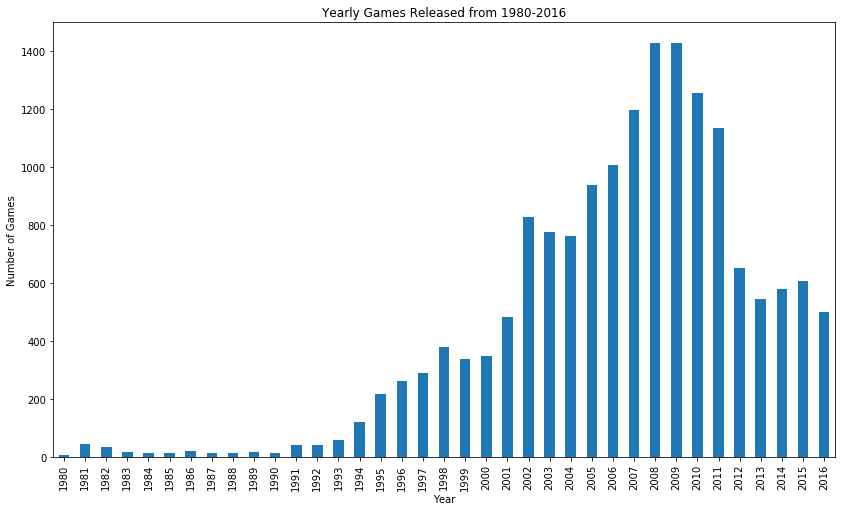

In [6]:
# observing how many games were released in different years
ax = game_data['year_of_release'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(14,8), 
                                                                    title='Yearly Games Released from 1980-2016')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Games')
plt.show()

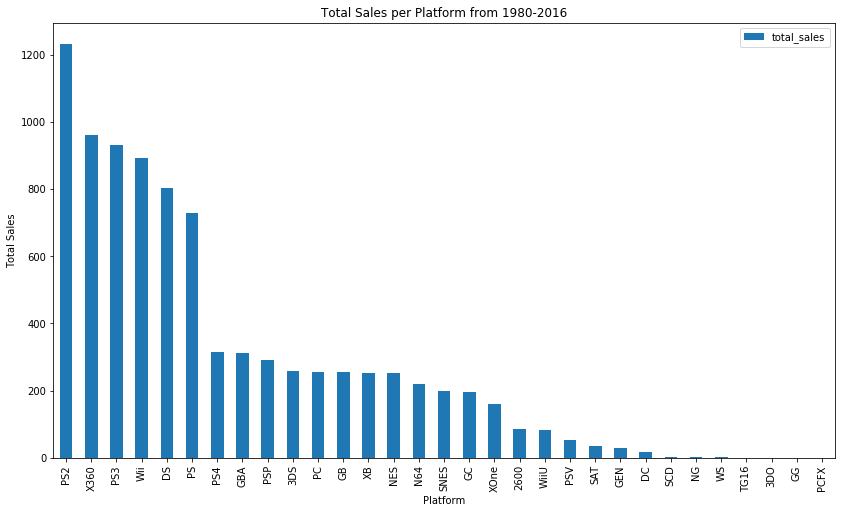

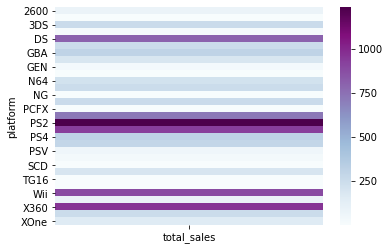

In [7]:
# analyzing how sales varied between platforms
platform_sales = game_data.sort_values(by='total_sales').pivot_table(index='platform', values='total_sales', aggfunc='sum')

ax = platform_sales.sort_values('total_sales', ascending=False).plot.bar(figsize=(14,8), 
                                                                         title='Total Sales per Platform from 1980-2016')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales')
plt.show()
sns.heatmap(platform_sales, cmap='BuPu')
plt.show()

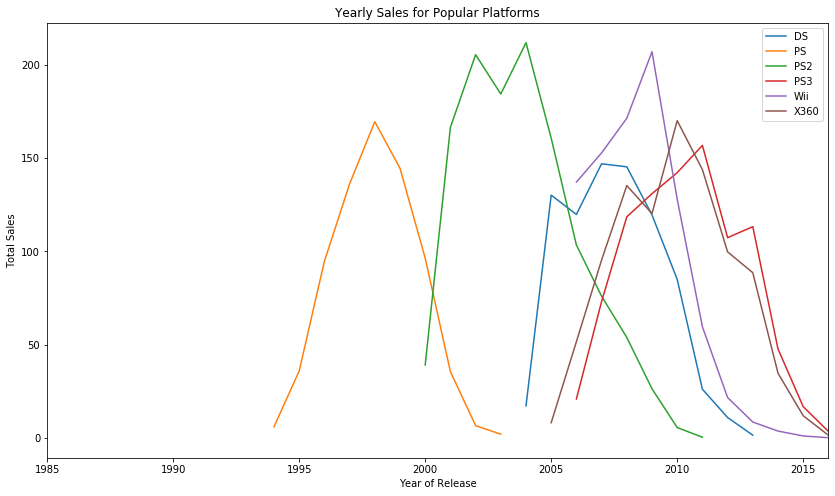

In [8]:
# platforms with the greatest total sales
platformyear_sales = game_data.query('platform == ["DS", "PS", "PS2", "PS3", "Wii", "X360"]')
platformyear_pivot = platformyear_sales.pivot_table(index='year_of_release', values='total_sales', 
                                                    columns='platform', aggfunc='sum')
ax = platformyear_pivot.plot(figsize=(14,8), title='Yearly Sales for Popular Platforms')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

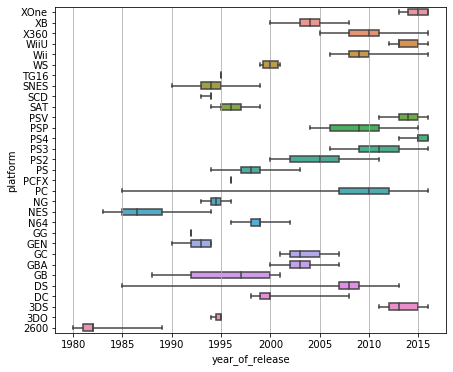

In [9]:
# platform relevance duration
f, ax = plt.subplots(figsize=(7, 6))
my_order = game_data.groupby(by=['platform'])['year_of_release'].min().iloc[::-1].index
sns.boxplot(x='year_of_release', y='platform', data=game_data, whis=[0,100], width=.6, order=my_order)
ax.xaxis.grid(True)

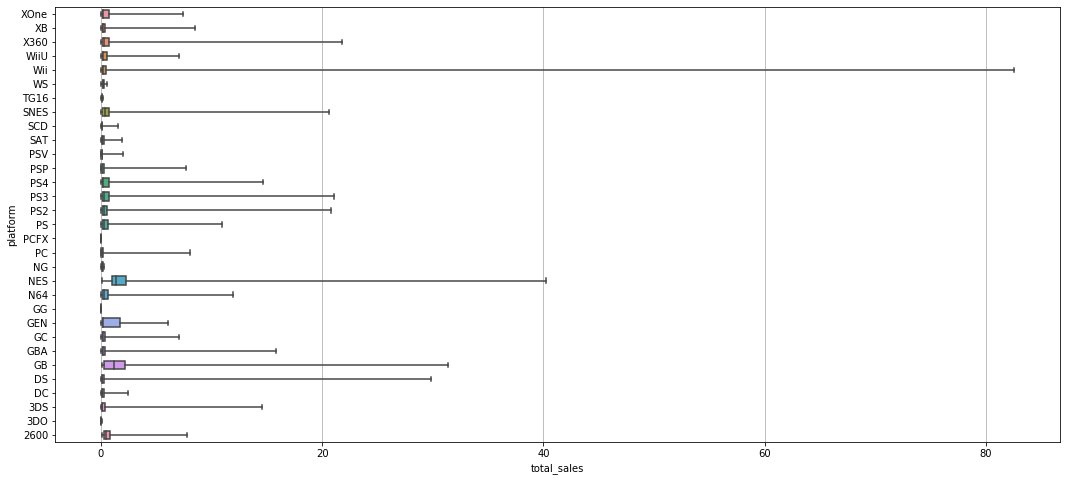

In [10]:
# platform and total sales before filtered years
f, ax = plt.subplots(figsize=(18, 8))
order2 = game_data.groupby(by=['platform'])['total_sales'].min().iloc[::-1].index
sns.boxplot(x='total_sales', y='platform', data=game_data, whis=[0,100], width=.6, order=order2)
ax.xaxis.grid(True)

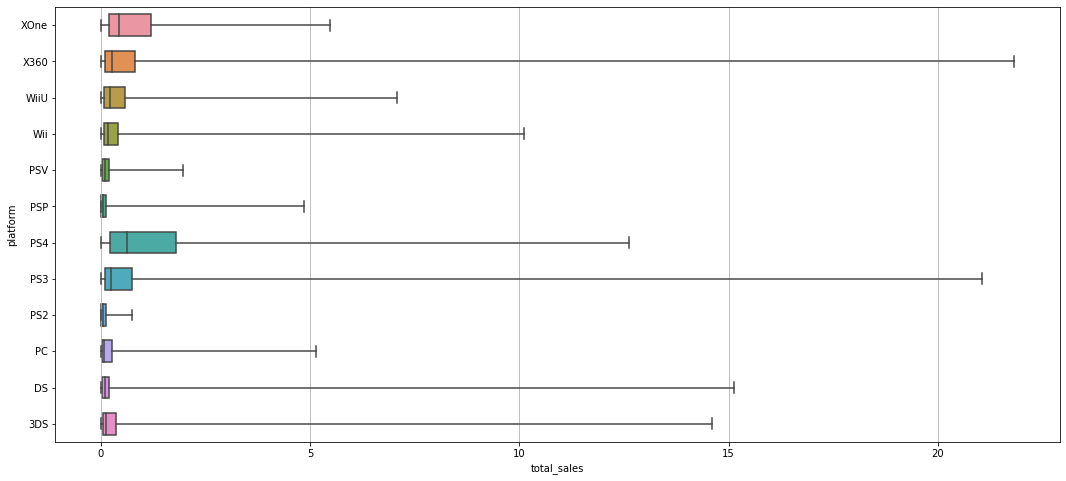

In [11]:
# filtering out relevant years and creating a new dataset
game_relevant = game_data.query('year_of_release == [2010, 2011, 2012, 2013, 2014]')

f, ax = plt.subplots(figsize=(18, 8))
order3 = game_relevant.groupby(by=['platform'])['total_sales'].min().iloc[::-1].index
sns.boxplot(x='total_sales', y='platform', data=game_relevant, whis=[0,100], width=.6, order=order3)
ax.xaxis.grid(True)

platform,3DS,PS4,XOne
count,6.000000,4.000000,4.000000
mean,42.968333,78.535000,39.830000
std,18.278261,40.567917,20.313977
min,15.140000,25.990000,18.960000
25%,31.775000,58.435000,24.352500
50%,47.560000,84.625000,40.110000
75%,55.267500,104.725000,55.587500
max,63.200000,118.900000,60.140000


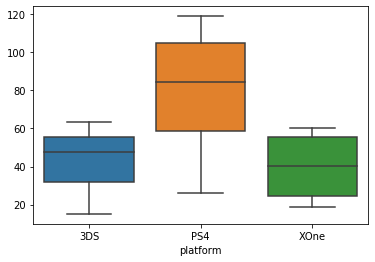

In [12]:
# dataset for filtered potentially profitable platforms
platform_profit = game_data.query('platform == ["XOne", "PS4", "3DS"]')

# the global sales of all games broken down by select potentially profitable platforms
profit_pivot = platform_profit.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
sns.boxplot(data=profit_pivot)
profit_pivot.describe()

-0.031957110204556424

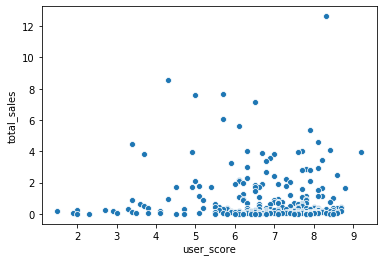

In [13]:
# analyzing how user and professional reviews affect sales for the DS
ps4_platform = game_data.query('platform == "PS4"')

sns.scatterplot(x='user_score', y='total_sales', data=ps4_platform)
ps4_platform['user_score'].corr(ps4_platform['total_sales'])

0.40656790206178095

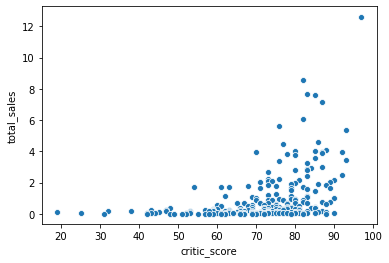

In [14]:
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_platform)
ps4_platform['critic_score'].corr(ps4_platform['total_sales'])

In [15]:
# looking at games that have many platforms
game_relevant['name'].value_counts()

# comparing the sales of FIFA 14 on other platforms
game_relevant.query('name == "FIFA 14"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E,3.01
1753,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E,1.16
4699,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E,0.41
4809,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E,0.40
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E,0.38
6871,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,NaN,NaN,Unknown,0.23
7875,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E,0.19


In [16]:
# comparing the sales of Ratatouille on other platforms
game_relevant.query('name == "Ratatouille"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,5.00000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000
mean,114.19200,9.804000,13.844000,44.078000,22.08800,3.97600,22.364000,51.892000,74.802000,12.84000,52.81200,6.572000
std,9.87266,5.464401,6.030869,31.517373,8.76855,4.09943,11.270483,10.437529,14.272644,6.14033,23.36148,4.950285
min,97.23000,5.570000,7.090000,22.220000,8.81000,0.96000,12.370000,44.450000,62.040000,5.58000,30.42000,0.980000
25%,115.29000,5.790000,9.180000,23.380000,18.37000,1.49000,13.610000,45.620000,65.210000,8.63000,41.17000,3.260000
50%,116.68000,6.090000,14.690000,25.270000,24.54000,1.72000,16.660000,46.910000,71.750000,13.36000,45.15000,6.120000
75%,119.25000,15.610000,15.850000,54.380000,27.68000,4.96000,34.370000,52.830000,76.830000,15.14000,56.08000,8.820000
max,122.51000,15.960000,22.410000,95.140000,31.04000,10.75000,34.810000,69.650000,98.180000,21.49000,91.24000,13.680000


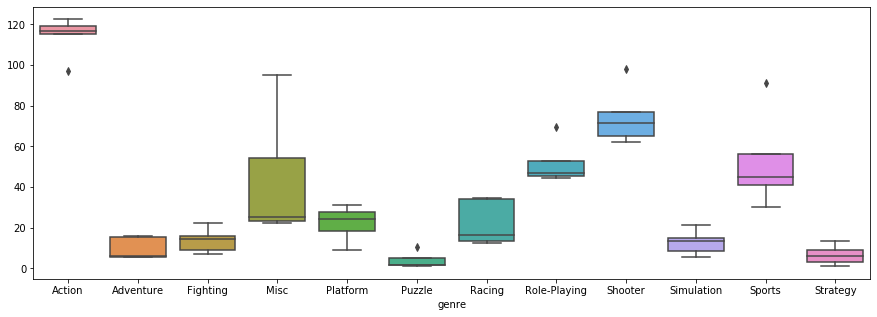

In [17]:
# analyzing games by genre
genre_pivot = game_relevant.pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum')
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=genre_pivot)
genre_pivot.describe()

### Conclusion

The histogram illustrates that the largest number of games were released between 2008-2009. The data also suggests that the platforms with the greatest total sales are DS, PS, PS2, PS3, Wii, and X360. The generated heat map implies that the platforms that used to be popular but now have zero sales are the: 2600, GBA, GEN, N64, NG, PCFX, SCD, and TG16. Subsequently, the PS2 platform had the greatest total sales. According to the chart of boxplots, new platforms generally seem to take between 2.5 to 3 years to appear and old platforms seem to last for about nine years. Considering the information the data has exhibited so far, analyses from here on will consider data from 2010 to 2014 to build a prognosis for 2017. Accordingly, the platforms that are leading in sales after filtering out the relevant years are X360, PS3, DS, 3DS, and PS4. Platforms that were released prior to 2010 will start shrinking in relevance since our data only goes to 2016, and it was previously observed that platforms seem to last for about nine years before fading out. For that reason, platforms that are released after 2010 have the possibility for growth. Some potentially profitable platforms could be XOne, PS4, and 3DS.

With this interpretation in mind, the differences in sales look fairly distinct from one another upon looking at the box plots generated for the global sales of all games that are broken down by the selected platforms. The average sales is greatest for the PS4 platform compared to the 3DS and XOne platforms. The relationship between the two types of reviews (user and critic) and platform sales for the PS4 was explored in particular, and the data shows that both types of reviews have a weak correlation on the effect of platform sales. However, out of the two weak correlated reviews, critic reviews have a higher correlation with platform sales than user reviews.

Game titles were observed to see which names have many cross platforms. FIFA 14 and Ratatouille were randomly picked for further comparison on their respective sales on other platforms. For FIFA 14 in particular, the most sales procured was on the PS3. The game Ratatouille had the most sales when purchased for the DS. In addition to viewing particular game titles, the game genres were also observed. According to the data, the most profitable genres appear to be action and sports games. The disparity in sales between the different genres could be attributed to the number of games released in a particular genre in a duration of time or the individual cost of a game that would affect the quantity of people willing to invest in buying that one game unit. As a result, the high and low sales cannot be generalized about game genres.

## Creating a user profile for each region

In [18]:
# North America user profile
na_profile = game_relevant[
    ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating']]

na_pivot = na_profile.pivot_table(index='platform', values='na_sales', aggfunc='sum', margins=True)
na_pivot.sort_values(by='na_sales', ascending=False)

,na_sales
platform,
All,978.62
X360,326.13
PS3,223.59
Wii,120.71
3DS,72.34
DS,59.66
PS4,44.88
XOne,42.82
PC,35.35


In [19]:
na_genre = na_profile.pivot_table(index='genre', values='na_sales', aggfunc='sum', margins=True)
na_genre.sort_values(by='na_sales', ascending=False)

,na_sales
genre,
All,978.62
Action,256.96
Shooter,189.29
Sports,130.50
Misc,118.22
Role-Playing,92.23
Platform,51.12
Racing,43.29
Fighting,33.51


In [20]:
na_rating = na_profile.pivot_table(index='rating', values='na_sales', aggfunc='sum', margins=True)
na_rating.sort_values(by='na_sales', ascending=False)

,na_sales
rating,
All,978.62
M,335.19
E,244.56
E10+,141.51
T,137.95
Unknown,118.28
EC,1.13
RP,0.00


In [21]:
# Europe user profile
eu_profile = game_relevant[
    ['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating']]

eu_pivot = eu_profile.pivot_table(index='platform', values='eu_sales', aggfunc='sum', margins=True)
eu_pivot.sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
All,693.27
PS3,206.30
X360,159.20
Wii,65.18
PC,59.72
PS4,57.55
3DS,53.88
DS,28.06
XOne,23.49


In [22]:
eu_genre = eu_profile.pivot_table(index='genre', values='eu_sales', aggfunc='sum', margins=True)
eu_genre.sort_values(by='eu_sales', ascending=False)

,eu_sales
genre,
All,693.27
Action,198.81
Shooter,131.17
Sports,89.02
Misc,61.83
Role-Playing,58.27
Racing,48.23
Platform,35.10
Simulation,22.65


In [23]:
eu_rating = eu_profile.pivot_table(index='rating', values='eu_sales', aggfunc='sum', margins=True)
eu_rating.sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
All,693.27
M,246.50
E,162.51
Unknown,103.73
T,92.76
E10+,87.74
RP,0.03
EC,0.00


In [24]:
# Japan user profile
jp_profile = game_relevant[
    ['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating']]

jp_pivot = jp_profile.pivot_table(index='platform', values='jp_sales', aggfunc='sum', margins=True)
jp_pivot.sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
All,251.74
3DS,77.07
PS3,54.29
PSP,42.08
DS,27.90
Wii,17.75
PSV,13.43
WiiU,8.89
X360,5.46


In [25]:
jp_genre = jp_profile.pivot_table(index='genre', values='jp_sales', aggfunc='sum', margins=True)
jp_genre.sort_values(by='jp_sales', ascending=False)

,jp_sales
genre,
All,251.74
Role-Playing,90.13
Action,49.15
Misc,21.10
Platform,14.39
Sports,13.86
Adventure,13.45
Fighting,12.36
Simulation,11.37


In [26]:
jp_rating = jp_profile.pivot_table(index='rating', values='jp_sales', aggfunc='sum', margins=True)
jp_rating.sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
All,251.74
Unknown,138.60
E,42.62
T,34.41
M,26.16
E10+,9.95
EC,0.00
RP,0.00


### Conclusion

A user profile was created for North America, Europe, and Japan and the following were observed:
 
***North America (NA):*** The top five platforms that produced the most sales are: X360, PS3, Wii, 3DS, and DS. The NA region is making the most video game sales compared to EU and JP. The top five game genres that produced the most sales are: action, shooter, sports, miscellaneous, and role-playing. These most popular genres are identical to EU's, possibly because&mdash;in addition to both regions' most popular platforms also being similar&mdash;the platforms these game genres are played on requires a television to plug in; JP's popular platforms are mostly hand-held consoles. The ESRB rating that generates the most sales is M.
 
***Europe (EU):*** The top five platforms that produced the most sales are: PS3, X360, Wii, PC, and PS4. The EU region makes more video game sales than JP, however EU makes less sales compared to NA. The top five game genres that produced the most sales are: action, shooter, sports, miscellaneous, and role-playing. These most popular genres are identical to NA's, possibly because&mdash;in addition to both regions' most popular platforms also being similar&mdash;the platforms these game genres are played on requires a television to plug in; JP's popular platforms are mostly hand-held consoles. The ESRB rating that generates the most sales is M.
 
***Japan (JP):*** The top five platforms that produced the most sales are: 3DS, PS3, PSP, DS, and Wii. The JP region makes the least video game sales than NA and EU. The top five game genres that produced the most sales are: role-playing, action, miscellaneous, platform, and sports. These most popular genres have games that are released for hand-held platforms which coincidentally are the most popular platforms in JP. The EU and NA have similar genres and platforms in their regions and those platforms are mostly television plug-in consoles. The ESRB rating that generates the most sales is indeterminate since *Unknown* is what was put in place of the missing values. However, disregarding the unknown genre group, the next ESRB rating that generates the most sales is E.

## Testing hypotheses

1. Is there a difference between the average user ratings of the Xbox One and PC platforms?
2. Is there a difference between the average user ratings for the action and sports video game genres?

In [27]:
# calculating variance and standard deviation for average user ratings of the Xbox One and PC platforms
xbox = game_data.query('platform == "XOne"')
pc_plat = game_data.query('platform == "PC"')

print(xbox['user_score'].describe())
print('Variance (xbox):', xbox['user_score'].var())
print()
print(pc_plat['user_score'].describe())
print('Variance (pc_plat):', pc_plat['user_score'].var())

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Variance (xbox): 1.9069968429360695

count    755.000000
mean       7.065960
std        1.532718
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64
Variance (pc_plat): 2.3492243750768527


In [28]:
# Is there a difference between the average user ratings of the Xbox One and PC platforms?

# hypothesis testing
alpha = 0.05
results = st.ttest_ind(xbox['user_score'], pc_plat['user_score'], equal_var=False, nan_policy='omit')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 4.538580296377245e-06
We reject the null hypothesis


In [29]:
# calculating variance and standard deviation for average user ratings of the Xbox One and PC platforms
action = game_data.query('genre == "Action"')
sports = game_data.query('genre == "Sports"')

print(action['user_score'].describe())
print('Variance (action):', action['user_score'].var())
print()
print(sports['user_score'].describe())
print('Variance (sports):', sports['user_score'].var())

count    1796.000000
mean        7.058129
std         1.423901
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64
Variance (action): 2.027493768262496

count    1081.000000
mean        6.951434
std         1.619585
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64
Variance (sports): 2.6230558125192722


In [30]:
# Is there a difference between the average user ratings for the action and sports video game genres?

# hypothesis testing
alpha = 0.05
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, nan_policy='omit')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.07370217419286358
We can't reject the null hypothesis


### Conclusion

For the first hypothesis test we have the following:

$H_{0}$: The average user ratings is equal for the Xbox One and PC.
<br>$H_{a}$: The average user ratings is not equal for the Xbox One and PC.

The null hypothesis usually indicates no change or that the items being compared are equal to each other. The alternative hypothesis would be sensical to be the opposite, which is to indicate a change or that the items being compared are not equal to each other. Thus, the aforementioned hypotheses were formulated to analyze average user ratings of the Xbox One and PC platforms. An alpha value of 0.05 was used since it is the most commonly used statistical significance level.

With a p-value of approximately 4.54e-06 (a small number), which is less than 0.05, we reject $H_{0}$ and determine that the average user ratings is not equal for the Xbox One and PC.

For the second hypothesis test we have the following:

$H_{0}$: The average user ratings is equal for the action and sports video game genres.
<br>$H_{a}$: The average user ratings is not equal for the action and sports video game genres.

To reiterate, the null hypothesis usually indicates no change or that the items being compared are equal to each other. The alternative hypothesis would be sensical to be the opposite, which is to indicate a change or that the items being compared are not equal to each other. Thus, the aforementioned hypotheses were formulated to analyze the average user ratings for the action and sports video game genres. An alpha value of 0.05 was used since it is the most commonly used statistical significance level.

With a p-value of approximately 0.0737, we do not reject $H_{0}$ and determine that the average user ratings is equal for the action and sports video game genres.